### Task 1: Data Collection and Visualization

#### Objective:
The primary objective of Task 1 is to analyze well data from the Bakken region, collected from the webpage [Bakken Wells Data](https://www.dmr.nd.gov/oilgas/bakkenwells.asp). The task involves scraping the data for all formations listed in the dropdown menu, followed by creating visualizations to address specific business and operational questions.

#### Key Questions to Address:
1. **Most Active Operators and Formations**:
   - Identify which operators and formations contribute the most to well activity in the Bakken.

2. **Completions Over Time**:
   - Analyze how the number of well completions has varied over time and identify significant trends.

3. **Differences Across Operators and Formations**:
   - Investigate whether trends in well completions differ between operators and formations, and if so, why.

4. **Drivers of Differences**:
   - Discuss potential key drivers behind the observed differences in trends across operators and formations.

#### Approach:
- **Data Collection**:
  - Scrape the Bakken well data for all formations listed on the webpage using web scraping techniques.
  - Store the data in a structured format (CSV) for analysis.

- **Data Cleaning and Preprocessing**:
  - Standardize the data to ensure compatibility for analysis, including converting dates and numeric columns to the appropriate format.

- **Exploratory Data Analysis**:
  - Use Python's visualization libraries to create charts and graphs that address the task's questions.

- **Insights and Business Implications**:
  - Derive actionable insights from the data and interpret results to provide meaningful business implications.

#### Deliverables:
- Cleaned and structured dataset for further analysis.
- Visualizations for each question to aid in understanding trends and patterns.
- Detailed interpretations of the visualizations to address the task's objectives.


In [1]:
# Importing necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Informing the user about progress
print("Libraries imported successfully!")


Libraries imported successfully!


#### Import Libraries and Set Up Environment

1. Import essential libraries for web scraping, data manipulation, and visualization.
2. **Libraries Used**:
   - `requests`: To send HTTP requests and fetch webpage content.
   - `BeautifulSoup`: To parse HTML content and extract specific elements (dropdown menu, tables).
   - `pandas`: To organize data into DataFrames for analysis.
   - `matplotlib.pyplot`: To create visualizations for trends and insights.
3. A `print` statement confirms successful imports.


In [2]:
# Define the base URL
base_url = "https://www.dmr.nd.gov/oilgas/bakkenwells.asp"

# Fetch the page content
response = requests.get(base_url)
soup = BeautifulSoup(response.text, 'html.parser')
print("Webpage fetched successfully!")

# Extract dropdown menu options
dropdown = soup.find("select", {"name": "menu1"})
formations = {}

for option in dropdown.find_all("option"):
    if option['value'] != "SF":  # Skip placeholder option
        formations[option.text.strip()] = option['value']

# Display the extracted formations
print(f"Formations Found: {len(formations)}")
print(f"Formations: {list(formations.keys())}")


Webpage fetched successfully!
Formations Found: 6
Formations: ['Middle Bakken', 'Three Forks', 'Middle Bakken / Three Forks', 'Lodgepole', 'Upper Bakken Shale', 'Lodgepole / Middle Bakken']


##### Fetch Dropdown Options Dynamically

1. Dynamically extract all formations available in the dropdown menu on the webpage.
2. **Steps**:
   - The `requests.get()` method fetches the webpage content.
   - The `soup.find()` method locates the dropdown menu by its HTML attribute (`name="menu1"`).
   - A dictionary `formations` is populated with formation names (keys) and their corresponding values (used for form submission).
3. Print the number of formations extracted and their names.



In [3]:
# Data storage
all_data = []

# Scrape data for each formation
for formation_name, formation_value in formations.items():
    # Send a POST request for the current formation
    response = requests.post(
        base_url,
        data={"menu1": formation_value}
    )
    soup = BeautifulSoup(response.text, 'html.parser')
    print(f"Fetching data for formation: {formation_name}")

    # Locate the table in the response
    table = soup.find("table", id="bakken-horizontal")
    if table:
        # Extract headers and rows
        headers = [th.text.strip() for th in table.find_all("th")]
        rows = [
            [td.text.strip() for td in row.find_all("td")]
            for row in table.find_all("tr")[1:]
        ]
        # Create a DataFrame for the formation
        df = pd.DataFrame(rows, columns=headers)
        df["Formation"] = formation_name  # Add formation name column
        all_data.append(df)
        print(f"Data successfully scraped for {formation_name}!")
    else:
        print(f"No data found for formation: {formation_name}")

print(f"Data scraping complete for {len(all_data)} formations.")


Fetching data for formation: Middle Bakken
Data successfully scraped for Middle Bakken!
Fetching data for formation: Three Forks
Data successfully scraped for Three Forks!
Fetching data for formation: Middle Bakken / Three Forks
Data successfully scraped for Middle Bakken / Three Forks!
Fetching data for formation: Lodgepole
Data successfully scraped for Lodgepole!
Fetching data for formation: Upper Bakken Shale
Data successfully scraped for Upper Bakken Shale!
Fetching data for formation: Lodgepole / Middle Bakken
Data successfully scraped for Lodgepole / Middle Bakken!
Data scraping complete for 6 formations.


##### Scrape Data for Each Formation

1. Scrape the well data table for each formation from the webpage.
2. **Steps**:
   - Send a POST request with the formation value to retrieve the corresponding table.
   - Parse the response using BeautifulSoup to locate the table by its `id`.
   - Extract table headers and rows to populate a DataFrame.
   - Append the formation name to the DataFrame for identification.
   - Append the DataFrame to the `all_data` list.



In [4]:
# Combine all scraped data
if all_data:
    final_df = pd.concat(all_data, ignore_index=True)
    final_df.to_csv("bakken_wells_raw.csv", index=False)
    print(f"Combined data saved to 'bakken_wells_raw.csv'. Total rows: {len(final_df)}")
else:
    print("No data to save. Scraping might have failed.")


Combined data saved to 'bakken_wells_raw.csv'. Total rows: 16110


##### Combine and Save Raw Data

1. Combine data from all formations into a single DataFrame and save it for reference.
2. **Steps**:
   - Use `pd.concat()` to merge individual DataFrames in `all_data`.
   - Save the combined DataFrame to a CSV file for future use.



In [5]:
# Load the raw data
final_df = pd.read_csv("bakken_wells_raw.csv")
print(f"Loaded data with {final_df.shape[0]} rows and {final_df.shape[1]} columns.")

# Convert date columns to datetime
date_cols = ['Completion Date', 'Last Prod Rpt Date']
for col in date_cols:
    final_df[col] = pd.to_datetime(final_df[col], errors='coerce')

# Convert production columns to numeric
prod_cols = ['Cum Oil', 'Cum Water', 'Cum Gas']

for col in prod_cols:
    # Ensure the column is treated as a string before using .str.replace
    final_df[col] = final_df[col].astype(str).str.replace(',', '').replace('nan', None)
    # Convert the cleaned strings to numeric
    final_df[col] = pd.to_numeric(final_df[col], errors='coerce')

# Print column data types after conversion
print(final_df[prod_cols].dtypes)
print("Production columns successfully converted to numeric.")

# Drop duplicates
initial_rows = final_df.shape[0]
final_df = final_df.drop_duplicates()
print(f"Dropped {initial_rows - final_df.shape[0]} duplicate rows.")

# Save cleaned data
final_df.to_csv("bakken_wells_cleaned.csv", index=False)
print("Cleaned data saved to 'bakken_wells_cleaned.csv'.")


Loaded data with 16110 rows and 15 columns.
Cum Oil      int64
Cum Water    int64
Cum Gas      int64
dtype: object
Production columns successfully converted to numeric.
Dropped 0 duplicate rows.
Cleaned data saved to 'bakken_wells_cleaned.csv'.


##### Data Cleaning and Preprocessing

1. Prepare the raw data for analysis by standardizing formats and removing inconsistencies.
2. **Steps**:
   - Load raw data from the previously saved CSV file.
   - Convert date columns to datetime format for chronological analysis.
   - Convert cumulative production columns (`Cum Oil`, `Cum Water`, `Cum Gas`) to numeric for calculations.
   - Remove duplicate rows to ensure data integrity.



#### Exploratory Data Analysis

1. **Question 1**: "Which are the most active operators and formations in the Bakken?"
   - Count the number of wells per operator and formation to identify the most active ones.
   - Print and visualize the top operators and formations.



Top 10 Most Active Operators:
CONTINENTAL RESOURCES, INC.                  1850
WHITING OIL AND GAS CORPORATION              1829
HESS BAKKEN INVESTMENTS II, LLC              1595
OASIS PETROLEUM NORTH AMERICA LLC            1552
GRAYSON MILL OPERATING, LLC                  1070
XTO ENERGY INC                                896
ENERPLUS RESOURCES USA CORPORATION            849
MARATHON OIL COMPANY                          812
BURLINGTON RESOURCES OIL & GAS COMPANY LP     809
EOG RESOURCES, INC.                           749
Name: Operator, dtype: int64


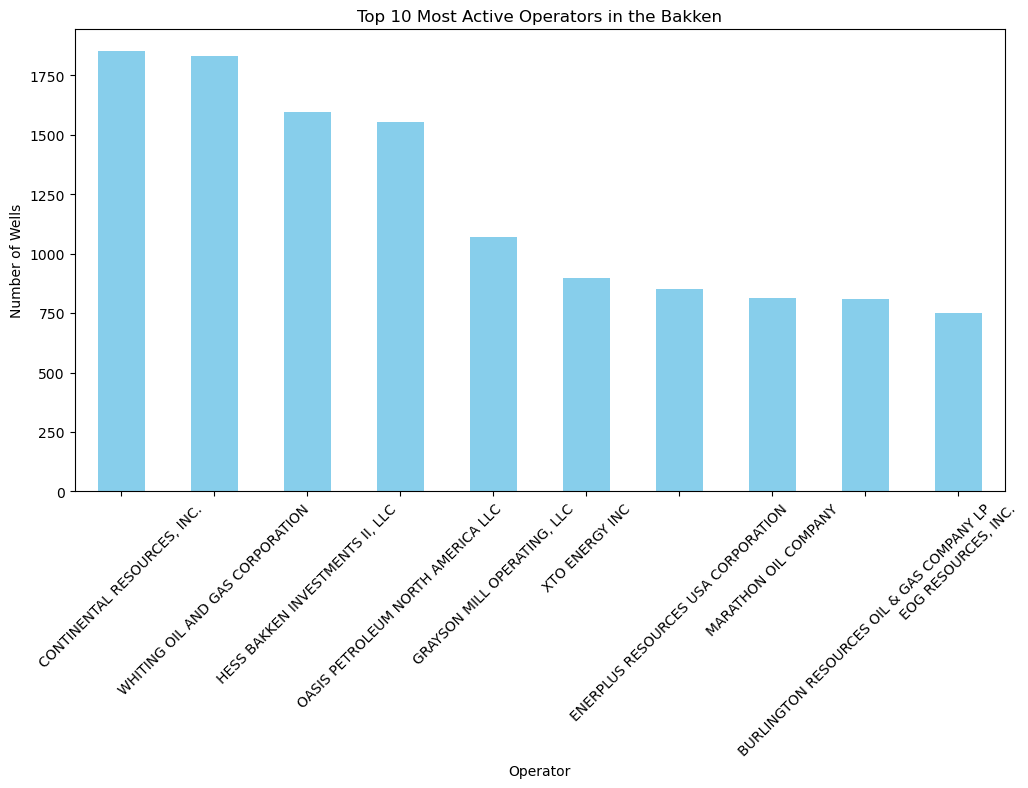

Number of Wells by Formation:
Middle Bakken                  9907
Three Forks                    5877
Upper Bakken Shale              237
Middle Bakken / Three Forks      84
Lodgepole                         3
Lodgepole / Middle Bakken         2
Name: Formation, dtype: int64


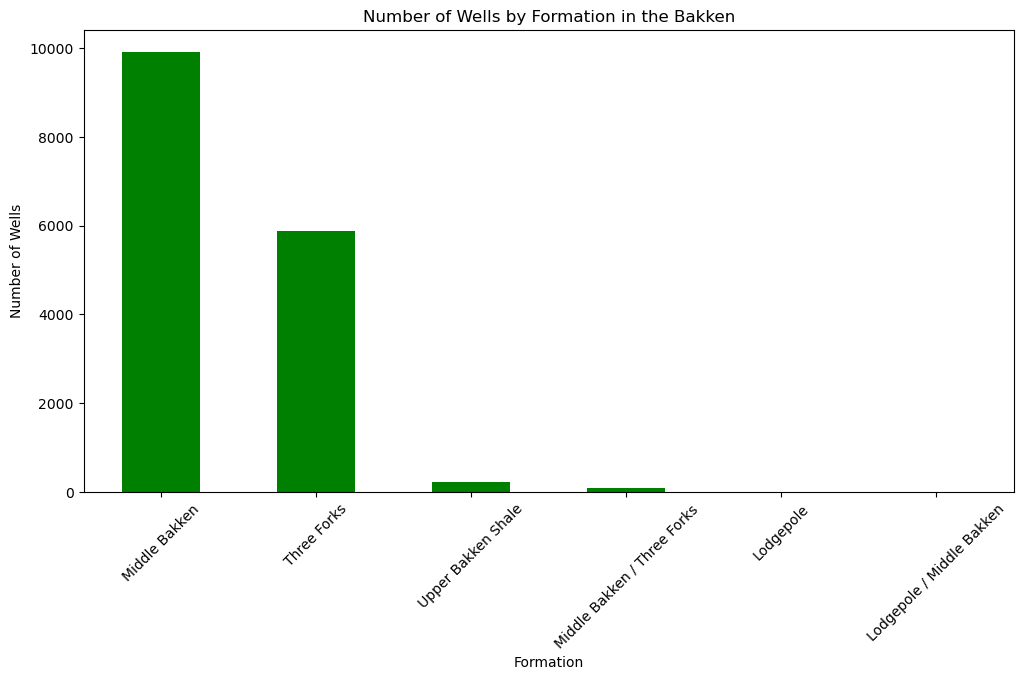

In [6]:
import matplotlib.pyplot as plt

# Top 10 most active operators
top_operators = final_df['Operator'].value_counts().head(10)
print("Top 10 Most Active Operators:")
print(top_operators)

# Plot for top 10 operators
plt.figure(figsize=(12, 6))
top_operators.plot(kind='bar', color='skyblue', title="Top 10 Most Active Operators in the Bakken")
plt.xlabel("Operator")
plt.ylabel("Number of Wells")
plt.xticks(rotation=45)
plt.show()

# Distribution of wells by formation
formation_counts = final_df['Formation'].value_counts()
print("Number of Wells by Formation:")
print(formation_counts)

# Plot for formation distribution
plt.figure(figsize=(12, 6))
formation_counts.plot(kind='bar', color='green', title="Number of Wells by Formation in the Bakken")
plt.xlabel("Formation")
plt.ylabel("Number of Wells")
plt.xticks(rotation=45)
plt.show()





1. **Most Active Operators**:
   - The top 10 operators include companies such as:
     - `Continental Resources, Inc.`
     - `Whiting Oil and Gas Corporation`
     - `Hess Bakken Investments II, LLC`
   - These operators are highly active due to their strategic focus on prolific formations, advanced drilling technologies, and operational scale.

2. **Most Active Formations**:
   - The "Middle Bakken" formation dominates in activity, contributing to the majority of wells drilled.
   - Other active formations include "Three Forks" and "Upper Bakken Shale," indicating their significance in resource richness and operator interest.


- The bar chart of the top 10 operators highlights the dominance of leading companies in the Bakken region.
- The distribution of wells by formation reveals that "Middle Bakken" accounts for the largest share of activity.


- The high activity levels in specific formations and by certain operators suggest focused investment in areas with high economic returns.
- Understanding the most active operators and formations can guide decisions on partnerships, investments, and market strategies.


##### Question 2: "How has the number of completions varied over time?"

Number of Completions by Year:
Completion Year
1986.0       1
1987.0       1
1988.0      10
1989.0      30
1990.0      69
1991.0      43
1992.0      29
1993.0      24
1994.0      10
1995.0       2
1997.0       1
2001.0       2
2002.0       1
2003.0       1
2004.0       6
2005.0      31
2006.0      75
2007.0     165
2008.0     434
2009.0     473
2010.0     776
2011.0    1255
2012.0    1802
2013.0    1995
2014.0    2161
2015.0    1495
2016.0     733
2017.0     986
2018.0    1247
2019.0    1234
2020.0     527
2021.0      14
2022.0     153
2023.0      28
2024.0       1
Name: File No, dtype: int64


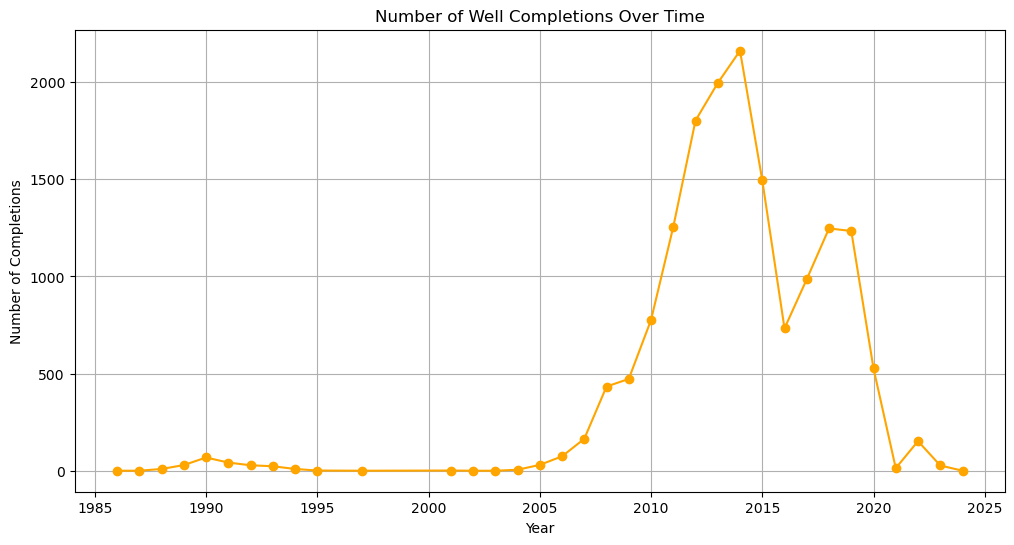

In [7]:
# Convert Completion Date to datetime and extract year
final_df['Completion Date'] = pd.to_datetime(final_df['Completion Date'], errors='coerce')
final_df['Completion Year'] = final_df['Completion Date'].dt.year

# Number of completions by year
completions_by_year = final_df.groupby('Completion Year')['File No'].count()
print("Number of Completions by Year:")
print(completions_by_year)

# Plot for completions over time
plt.figure(figsize=(12, 6))
completions_by_year.plot(kind='line', marker='o', title="Number of Well Completions Over Time", color='orange')
plt.xlabel("Year")
plt.ylabel("Number of Completions")
plt.grid()
plt.show()



1. **Overall Trend**:
   - The number of well completions has varied significantly over the years, reflecting market conditions, technological advancements, and regulatory changes.
   - Peaks in activity are often aligned with periods of high oil prices or technological breakthroughs, such as the adoption of horizontal drilling.

2. **Year-on-Year Changes**:
   - Completion activity shows spikes during boom periods and drops during market downturns, such as the 2008 financial crisis or the COVID-19 pandemic.


- The line chart of completions over time provides a clear visualization of trends, with noticeable peaks and valleys.
- It highlights how external factors such as market dynamics and technological shifts influence well completions.


- Operators can use historical completion trends to forecast future activities based on market conditions.
- Understanding these trends helps stakeholders make informed decisions about resource allocation and investment timing.

---

##### Question 3: "Are trends different across operators and/or formations?"

In [8]:
# Trends by operator (Top 5)
top_5_operators = top_operators.index[:5]  # Take only the first 5 operators
print("Top 5 Operators:", top_5_operators)


Top 5 Operators: Index(['CONTINENTAL RESOURCES, INC.', 'WHITING OIL AND GAS CORPORATION',
       'HESS BAKKEN INVESTMENTS II, LLC', 'OASIS PETROLEUM NORTH AMERICA LLC',
       'GRAYSON MILL OPERATING, LLC'],
      dtype='object')


In [9]:
operator_trends = final_df[final_df['Operator'].isin(top_5_operators)].groupby(['Completion Year', 'Operator']).size().unstack(fill_value=0)
print("Completion Trends for Top 5 Operators:")
print(operator_trends)

Completion Trends for Top 5 Operators:
Operator         CONTINENTAL RESOURCES, INC.  GRAYSON MILL OPERATING, LLC  \
Completion Year                                                             
1986.0                                     1                            0   
1987.0                                     0                            0   
1988.0                                     0                            0   
1990.0                                     0                            0   
1991.0                                     1                            0   
1992.0                                     0                            0   
1993.0                                     0                            0   
2004.0                                     3                            0   
2005.0                                     4                            0   
2006.0                                    14                            3   
2007.0                               

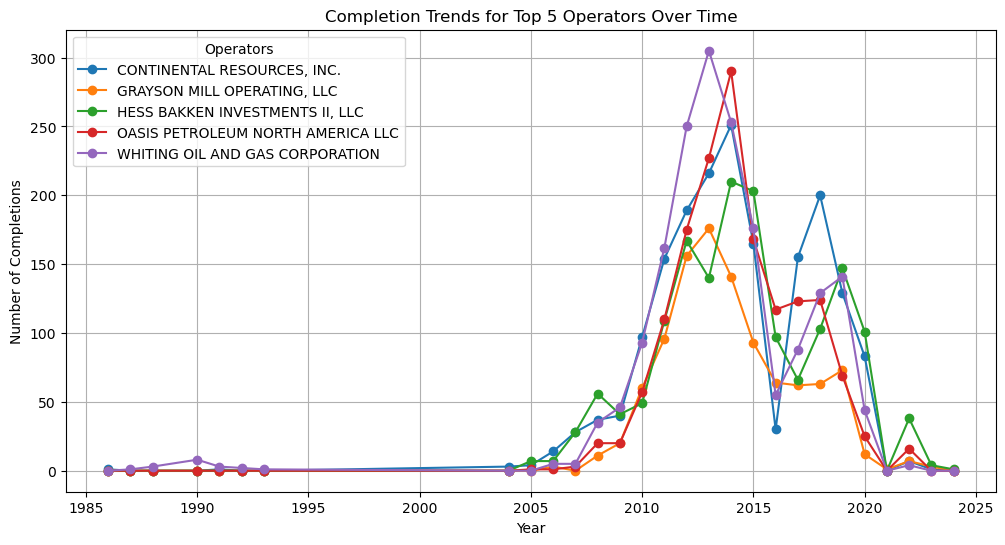

In [10]:


# Plot trends for top 5 operators
operator_trends.plot(figsize=(12, 6), title="Completion Trends for Top 5 Operators Over Time", marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Completions")
plt.legend(title="Operators", loc='upper left')
plt.grid()
plt.show()


Completion Trends by Formation:
Formation        Lodgepole  Lodgepole / Middle Bakken  Middle Bakken  \
Completion Year                                                        
1986.0                   0                          0              0   
1987.0                   0                          0              0   
1988.0                   0                          0              0   
1989.0                   0                          0              0   
1990.0                   0                          0              0   
1991.0                   0                          0              0   
1992.0                   0                          0              0   
1993.0                   0                          0              0   
1994.0                   0                          0              0   
1995.0                   0                          0              0   
1997.0                   0                          0              0   
2001.0                   0      

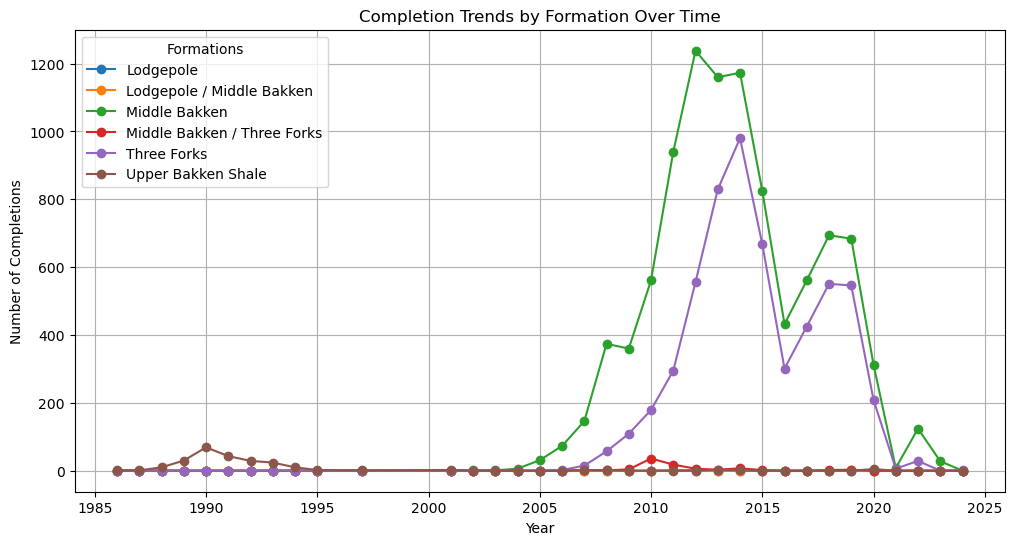

In [11]:
# Trends by formation
formation_trends = final_df.groupby(['Completion Year', 'Formation']).size().unstack(fill_value=0)
print("Completion Trends by Formation:")
print(formation_trends)

# Plot trends by formation
formation_trends.plot(figsize=(12, 6), title="Completion Trends by Formation Over Time", marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Completions")
plt.legend(title="Formations", loc='upper left')
plt.grid()
plt.show()



1. **Operator Trends**:
   - Trends across operators reveal that certain companies maintain consistent activity levels, while others experience fluctuations based on their operational strategies.
   - Top operators like `Continental Resources, Inc.` and `Hess Bakken Investments II, LLC` show steady contributions to yearly completions, indicating robust operational capabilities.

2. **Formation Trends**:
   - The "Middle Bakken" formation demonstrates consistent activity over time, reinforcing its importance as a key resource area.
   - Other formations, such as "Three Forks," exhibit periodic spikes in activity, reflecting targeted exploration efforts by operators.

3. **Key Observations**:
   - The variance in trends between operators and formations can be attributed to factors such as operator-specific strategies, formation geology, and external market conditions.


- The line charts for top 5 operators and formations show distinct patterns, helping identify who is driving activity and where.
- Peaks and troughs in activity by specific operators or formations align with periods of market opportunity or constraint.


- Recognizing these trends helps operators identify competitive advantages and adjust strategies accordingly.
- Investors and policymakers can leverage this understanding to prioritize regions or operators with consistent activity.

##### Question 4: "What do you think could be key drivers of these differences?"

Based on the analysis of completions by operators and formations over time, several key drivers may explain the observed differences:

1. **Operator Strategies**:
   - Different operators have varying operational strategies, including drilling technologies and geographical focuses. 
   - Some operators prioritize prolific formations like "Middle Bakken," while others may explore less active formations for strategic reasons.

2. **Formation Geology**:
   - The geology of formations plays a significant role in determining activity levels. For example:
     - "Middle Bakken" has the highest activity levels due to its favorable resource richness and ease of extraction.
     - Formations with complex geology or lower resource potential may see less activity.

3. **Market Dynamics**:
   - Fluctuating oil and gas prices significantly impact operator decisions. Higher oil prices may encourage more drilling, while lower prices lead to reduced activity.
   - Regulatory changes and environmental policies can also influence operator activity in certain formations.

4. **Well Productivity**:
   - Operators tend to focus on formations with historically higher cumulative production of oil, gas, or water.
   - Formations with higher output potential provide better economic returns, incentivizing operators to invest more heavily in these areas.

5. **Infrastructure and Accessibility**:
   - Proximity to existing infrastructure, such as pipelines and processing facilities, can make certain formations more attractive due to lower operational costs.
   - Remote formations may see less activity unless technological advancements reduce accessibility challenges.

6. **Technological Advances**:
   - Enhanced recovery methods, such as hydraulic fracturing and horizontal drilling, enable operators to extract resources from formations previously considered uneconomical.

These factors collectively influence the observed differences in operator activity and formation completions across the Bakken region.


In [12]:
# Save the cleaned and enriched DataFrame for dashboard use
final_df.to_csv("bakken_wells_dashboard.csv", index=False)
print("Structured data saved to 'bakken_wells_dashboard.csv'.")


Structured data saved to 'bakken_wells_dashboard.csv'.


##### Save Structured Data 

1. **Purpose**: Save the cleaned and enriched dataset for use in dashboards or further analysis.
2. **Steps**:
   - Write the final DataFrame to a CSV file named `bakken_wells_dashboard.csv`.
